In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.read_csv('Placement_Data_Full_Class.csv')
file.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
file.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
file.shape

(215, 15)

In [5]:
from sklearn.preprocessing import LabelEncoder
le_task_1=LabelEncoder()
file['degree_t']=le_task_1.fit_transform(file['degree_t'])
file['hsc_s']=le_task_1.fit_transform(file['hsc_s'])
file['specialisation']=le_task_1.fit_transform(file['specialisation'])
file['workex']=le_task_1.fit_transform(file['workex'])
file['hsc_b']=le_task_1.fit_transform(file['hsc_b'])
file['ssc_b']=le_task_1.fit_transform(file['ssc_b'])
file['gender']=le_task_1.fit_transform(file['gender'])


In [6]:
file.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,Placed,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,Placed,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,Placed,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,Not Placed,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,Placed,425000.0


In [7]:
file.shape

(215, 15)

In [8]:
list_drop=['sl_no','salary']
file.drop(list_drop, axis=1, inplace=True)
file.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,Placed
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,Placed
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,Placed
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,Not Placed
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,Placed


In [9]:
file.shape

(215, 13)

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04744209 0.22171682 0.04030651 0.15615775 0.03470825 0.04608255
 0.16960598 0.04213563 0.04495061 0.0696043  0.04485521 0.0824343 ]


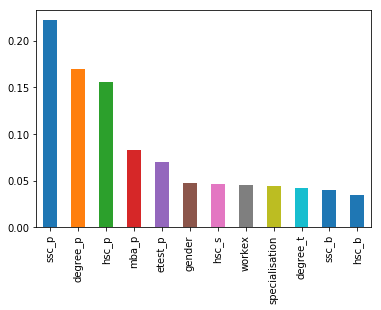

In [11]:
X = file.iloc[:,0:12] 
Y = file.iloc[:,-1]    
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')
plt.show()

In [12]:
file[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].head(10)


,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.00,58.80
1,79.33,78.33,77.48,86.50,66.28
2,65.00,68.00,64.00,75.00,57.80
3,56.00,52.00,52.00,66.00,59.43
4,85.80,73.60,73.30,96.80,55.50
5,55.00,49.80,67.25,55.00,51.58
6,46.00,49.20,79.00,74.28,53.29
7,82.00,64.00,66.00,67.00,62.14
8,73.00,79.00,72.00,91.34,61.29
9,58.00,70.00,61.00,54.00,52.21


In [14]:
X=file[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].values
X[0:5]

array([[67.  , 91.  , 58.  , 55.  , 58.8 ],
       [79.33, 78.33, 77.48, 86.5 , 66.28],
       [65.  , 68.  , 64.  , 75.  , 57.8 ],
       [56.  , 52.  , 52.  , 66.  , 59.43],
       [85.8 , 73.6 , 73.3 , 96.8 , 55.5 ]])

In [15]:
Y=file[['status']].values
Y[0:5]

array([['Placed'],
       ['Placed'],
       ['Placed'],
       ['Not Placed'],
       ['Placed']], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_trainset,X_testset,Y_trainset,Y_testset=train_test_split(X,Y,test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfm=RandomForestClassifier(n_estimators=40,oob_score=True,n_jobs=-1,random_state=40,max_features=None,min_samples_leaf=20)
rfm.fit(X_trainset,Y_trainset)
pre=rfm.predict(X_testset)
pre[0:5]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array(['Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed'],
      dtype=object)

In [19]:
Y_testset[0:5]

array([['Placed'],
       ['Placed'],
       ['Placed'],
       ['Placed'],
       ['Not Placed']], dtype=object)

In [20]:
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(Y_trainset,neigh.predict(X_testset)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_testset, pre))

Test set Accuracy:  0.9076923076923077


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,Y_trainset)
neigh

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
pre=neigh.predict(X_testset)
pre[0:10]

array(['Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed'], dtype=object)

In [24]:
Y_testset[0:10]

array([['Placed'],
       ['Placed'],
       ['Placed'],
       ['Placed'],
       ['Not Placed'],
       ['Not Placed'],
       ['Placed'],
       ['Not Placed'],
       ['Placed'],
       ['Placed']], dtype=object)

In [25]:
X.shape

(215, 5)

In [26]:
Y.shape

(215, 1)

In [34]:
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(Y_trainset,neigh.predict(X_testset)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_testset, pre))

Test set Accuracy:  0.7846153846153846


In [28]:
from sklearn.tree import DecisionTreeClassifier

dcstree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dcstree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
predtree=dcstree.predict(X_testset)

In [30]:
print(predtree[0:5])
print(Y_testset[0:5])

['Placed' 'Placed' 'Placed' 'Placed' 'Not Placed']
[['Placed']
 ['Placed']
 ['Placed']
 ['Placed']
 ['Not Placed']]


In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predtree))
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_trainset, predtree))

DecisionTrees's Accuracy:  0.8769230769230769
